# Lyft Data Set Analysis 
### By Alejandro Fosado and Brandon Lee

# Summary of Conclusions
In this study, we determined a driver's lifetime value, projected lifetime, and experience group. Using these three metrics, we also were able to provide two recommendations to help improve Lyft earnings and driver satisfaction. To find any of these values, we first had to clean the data which we completed in the “lyft_competition_cleaning.ipynb” file. Code for all visualizations in the notebook can be found in "graphing_methods.py"


The lifetime value of a driver is predominantly based on the total fare generated, number of rides per day, and average pick-up times. To calculate a single, cohesive value, we first had to normalize the data and give each different category a different weight. Many of the other values, such as number of prime rides or total number of rides are incorporated in total fare, so these statistics became redundant.

The projected lifetime of a driver was hard to estimate accurately due to the data set containing only data from a three month period. We used the formula where average driver lifetime is equal to one over the churn rate. This gave us 8.2 months as the projected average driver's lifetime.

To determine driver behavior, we decided to use the k-means clustering algorithm which resulted in three distinct groups: starting, average, and experienced drivers. The average lifetime values for each group are 500 dollars, 3000 dollars, and 7000 dollars respectively. This grouping then helped us generate our business recommendations.

Our two recommendations revolve around converting more starting and average drivers to experienced drivers while keeping experienced drivers active. There are many programs from Lyft that try to bring in new customers, but Lyft lacks systems to retain consistent drivers. One method that we recommend is a long-term ride per day program. A driver that has a history of higher number of rides per day may receive a higher pay. The second recommendation is introducing a loyalty program where drivers rank up based upon total number of rides. Both these recommendations help ensure experienced drivers are satisfied and convert new drivers into becoming experienced drivers. 

In [1]:
#use %matplotlib inline if viewing from notebook, %matplotlib notebook for pdf conversion
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits import mplot3d
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from graphing_methods import figure_one, figure_two, figure_three, figure_four

In [2]:
#read in tables
rides_ts = pd.read_csv('../ride_timestamps.csv')
#table created in lyft_competion_cleaning.ipynb
driver_full = pd.read_csv('../driver_full.csv')
driver_full = driver_full.set_index('driver_id')
#convert from string to datetime objects
rides_ts['timestamp'] = pd.to_datetime(rides_ts['timestamp'])

# Driver's Lifetime Value
We believe that a driver's lifetime value should be defined by three factors: total fare revenue generated, number of rides per day, and average pickup times. We chose this criteria because it is important that the drivers generate revenue as this is how the company will turn a profit. We believe that the number of rides per day should also be taken into consideration as it is important that these drivers work consistenly and when needed. We also chose to consider average pickup time as it is important the drivers provide quality customer service by being more efficient with their time. Using this criteria we created a formula to calculate the lifetime value of a driver (pickup time and rides per day are normalized):
### Lifetime Value = Total Revenue * (1 + tanh(Pickup Time) * .05 + tanh(Rides Per Day) * .10)

In [3]:
#normalizing values and calculating lifetime value
driver_full['lifetime_val'] = driver_full['total_fares']*(1+np.tanh(driver_full['pickup_time'].transform(
    lambda x:(x - x.mean())/x.std()))*.05+np.tanh(driver_full['rides_per_day'].transform(
    lambda x:(x - x.mean())/x.std()))*.1)

# Main Factors Affecting Driver's Lifetime Value
The main factors affecting a driver's lifetime value are ride frequency, pickup times and total fares collected. This is fairly straightforward as they are the values used in the calculation of a driver's lifetime value. Many other factors have a large effect on a drivers lifetime value but are redundant to mention as they are taken into account by the total fare calculation. For example, total number of rides:

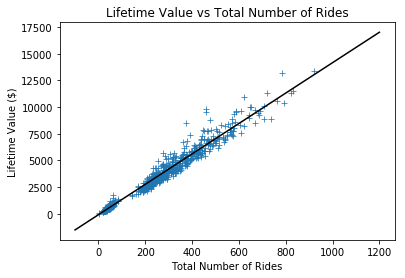

R^2 value for this model is: 0.9673281979940891


In [4]:
figure_one(driver_full)

As you can see above, the number of rides a driver gives is highly correlated with their lifetime value. This makes sense as more rides means more fares, which in turn is a direct contributor to the driver's lifetime value. From this we can also infer that total distance and drive time of a driver is also highly correlated with driver's lifetime value as those factors also contribute to more fares. Furthermore, the number of rides during prime time and days working for Lyft also are contributors to more total fares so those factors also contribute to a greater lifetime value.

# Average Projected Lifetime of a Driver

While we could just compute the mean of the lifetime column in our driver_full table, we feel this would not accurately estimate the average projected lifetime of a driver as many drivers will continue their Lyft careers beyond the data set's timeframe. This is because the datasets only span about a three month time period as seen below by finding the difference between the first and last ride timestamps:

In [5]:
max(rides_ts['timestamp']) - min(rides_ts['timestamp'])

Timedelta('90 days 19:02:32')

Knowing this limitation we decided on using this formula to project an average driver lifetime:
### Projected Lifetime = 1 / (Churn Rate)
To calculate the churn rate, the percentage of drivers who have decided not to stay with Lyft over the three month period, we calculated the percent of drivers inactive for more than seven days, meaning that they did not give a ride in the last week of the dataset. Using this formula we get that the projected lifetime of a driver is around 8.2 months.

In [6]:
churn_rate = np.count_nonzero([driver_full['time_inactive']>7])/len(driver_full)
#we must then multiply this number by three becuase the churn rate was calcuated over a three month period
proj_lifetime = 1/(churn_rate)*3
proj_lifetime

8.205882352941178

# Do All Drivers Act Alike?
In order to answer this question, we have decided to use the k-means clustering algorithm to find groups (clusters) in the data. After some experimentation, we found that the data can be separated into three different clusters. Here we use a normalized version of the driver_full table to apply the k-means clustering algorithm:

To get an idea of what the clustering looks like, we can plot the clusters and the columns which we used to compute lifetime value.

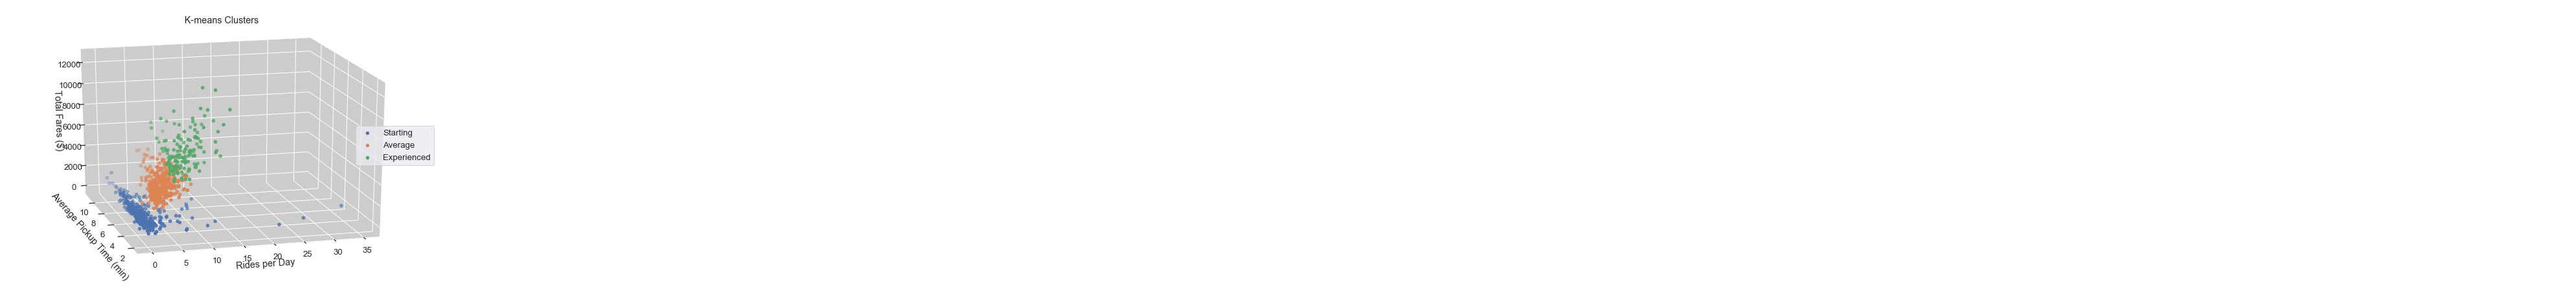

In [7]:
driver_full = figure_two(driver_full)

As seen above we have three clusters representing what we believe to be three different types of drivers. We call these groups starting, average, and experienced drivers. Below we will explore the differences between these groups:

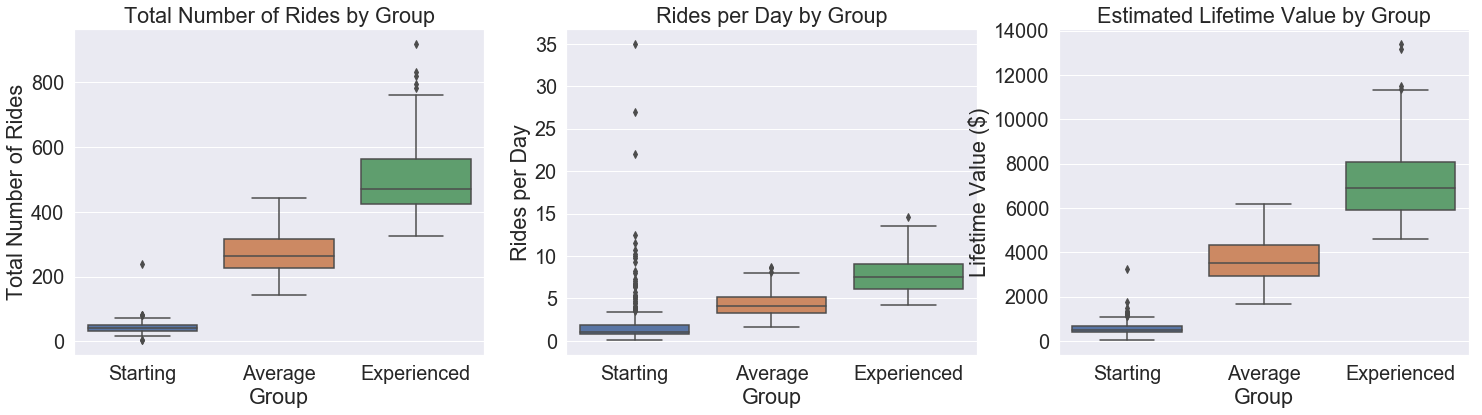

In [8]:
figure_three(driver_full)

The starting driver group is the most sporadic of all the groups as it contains the most outliers. Generally, starting drivers have around 50 total rides and around 2-3 rides per day. These drivers have a very low estimated lifetime values of around 500 dollars. The average drivers have a much larger amount of total rides of around 150 and give around 4-5 rides per day. These drivers have an estimated lifetime value of around 3000 dollars. Lastly, we have the experienced drivers. These drivers are the most important to the company as they have, on average, the most total rides, rides per day, and estimated lifetime value. This group has around 475 total rides and gives around 7-8 rides per day with an estimated lifetime value of around 7000 dollars. Below we will explore the contributions of each group to the company.

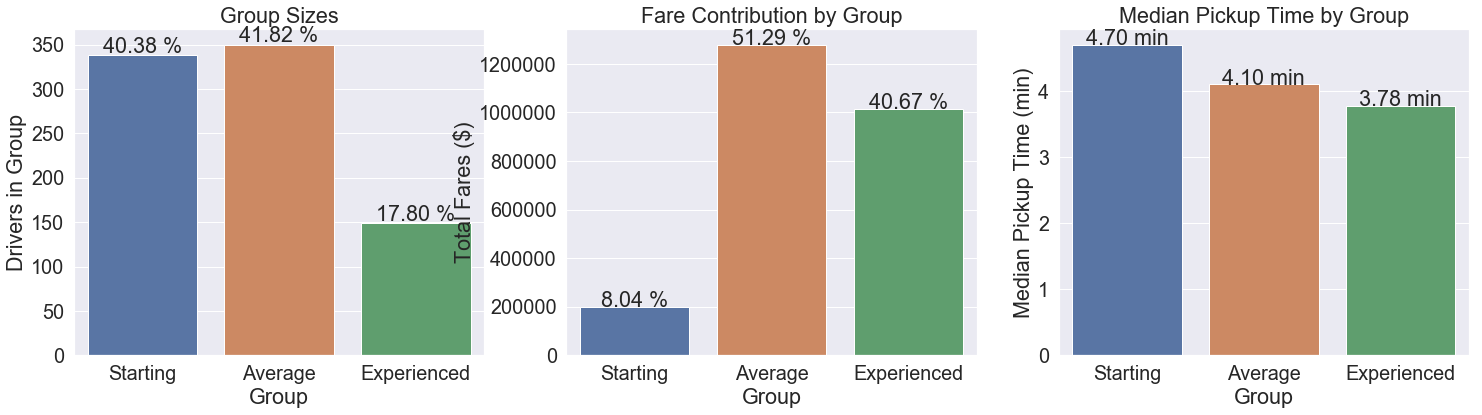

In [9]:
figure_four(driver_full)

Above we see that the second largest group is the starting drivers. These drivers make up 40% of the Lyft drivers but only contribute to 8% of the total fare revenue and have the worst median pickup times. The largest group, the average drivers generate a little over half of the total fare revenue with a better median pickup time than the starting group. The smallest group, the experienced drivers make up 18% of the Lyft drivers but contribute 41% of total fare revenue. The experienced group also has the best median pickup time.

# Business Recommendations

After analyzing the dataset provided, it is evident that Lyft drivers are split into three separate groups. These groups are based upon the various inputs considered for a driver’s lifetime value. The three groups are split into: experienced drivers, average drivers, and starting drivers. There are two main recommendations: retaining experienced drivers through incentives or benefits and converting starting drivers into experienced drivers. 

The first recommendation of retaining experienced drivers is supported by statistics showing that although experienced drivers make up only 18% of driver population, they account for 41% of the fare contribution. This means that keeping the experienced drivers happy will greatly benefit Lyft’s earnings and lead to a higher consistency in their drivers. Since total fare is based on rides per day, drivers who have a higher ride rate per day tend to have a higher lifetime value; therefore, implementing a system where more rides per day equates to higher pay for drivers may encourage higher involvement from drivers. Lyft already has a program called the Ride Challenge program, however, this program is very minimal. It only requires 10 rides within a week and the reward is only 25 dollars. This can be beneficial to pull in new drivers who do not consistently drive, but it does not provide much incentive for loyal drivers. 

Lyft also already provides other incentives, such as the 1k jacket, for long-term drivers. These are great, but lack any sustaining value. It is a simple, one time gift from Lyft, but there does not seem to be another long term benefit plan. The other promotions seem to focus on prime times or day to day benefits. These will not ensure more drivers will become experienced drivers.

The second recommendation is a lifetime loyalty program to promote sustained loyalty. Currently, Uber is doing a beta pro system for their drivers. Although we are not drivers for Uber, their ride customer program caught our interest and has helped sustain our use with Uber. The Uber reward system is based upon cancellation rates, arrival rates, star rating, and a point system. Rather than doing it this way, it may be better for Lyft to use a system where to improve ranking, the factors contributing to the driver's lifetime value must increase such as doing more rides per day on a consistent basis, driving more during prime time, and faster pick up times. 